In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

def Bells(a, b, f, phi, n):
    t = np.linspace(-0.05, 0.05, n)
    y = a*np.exp(-b**2 * t**2) * np.cos(2 * np.pi * f * t + phi)
    return y

In [2]:
bell = Bells(-1, 50, 30, np.pi, 100)
bell1 = np.concatenate((bell, np.zeros(99)))
bell2 = np.concatenate((bell, np.zeros(297)))

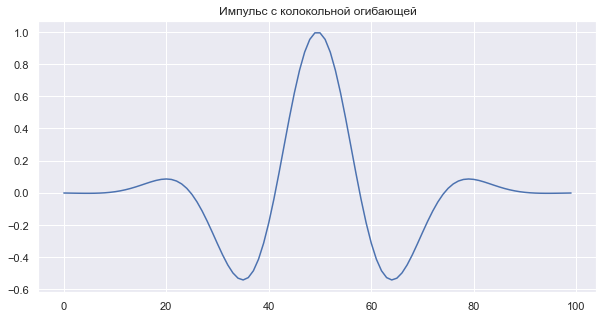

In [3]:
plt.figure(figsize=(10,5))
plt.title('Импульс с колокольной огибающей')
plt.plot(bell)
plt.show()

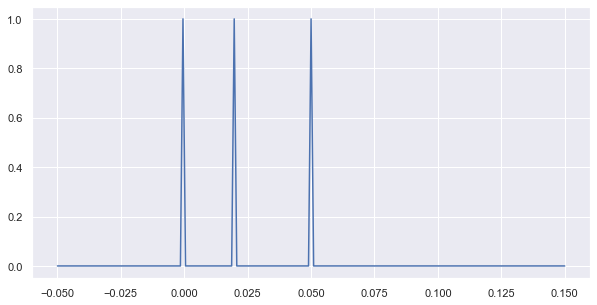

In [4]:
x = np.zeros(len(bell))
ones = [50, 70, 100]
for i in ones:
    x[i-1] = 1
    
plt.figure(figsize=(10,5))
plt.plot(np.linspace(-0.05, 0.15, 199), np.concatenate((x, np.zeros(99))))
plt.show()

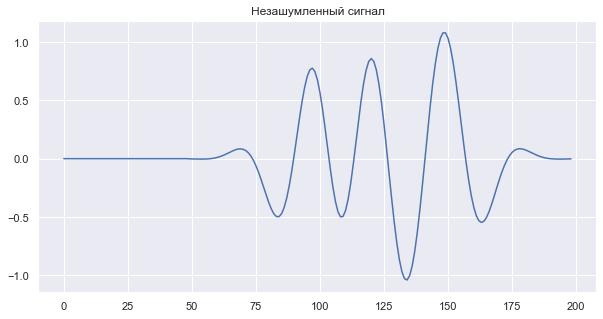

In [5]:
E = np.convolve(bell, x)
plt.figure(figsize=(10,5))
plt.title('Незашумленный сигнал')
plt.plot(E)
plt.show()

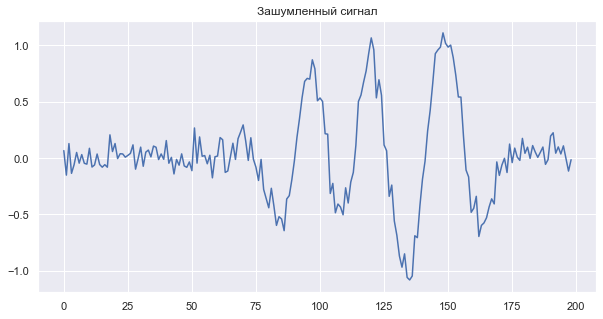

In [6]:
noised = E + np.random.normal(0, 0.1, E.size)
plt.figure(figsize=(10,5))
plt.plot(noised)
plt.title('Зашумленный сигнал')
plt.show()

In [7]:
image_E = np.fft.fft(E)
image_noised = np.fft.fft(noised)
image_bell1 = np.fft.fft(bell1)

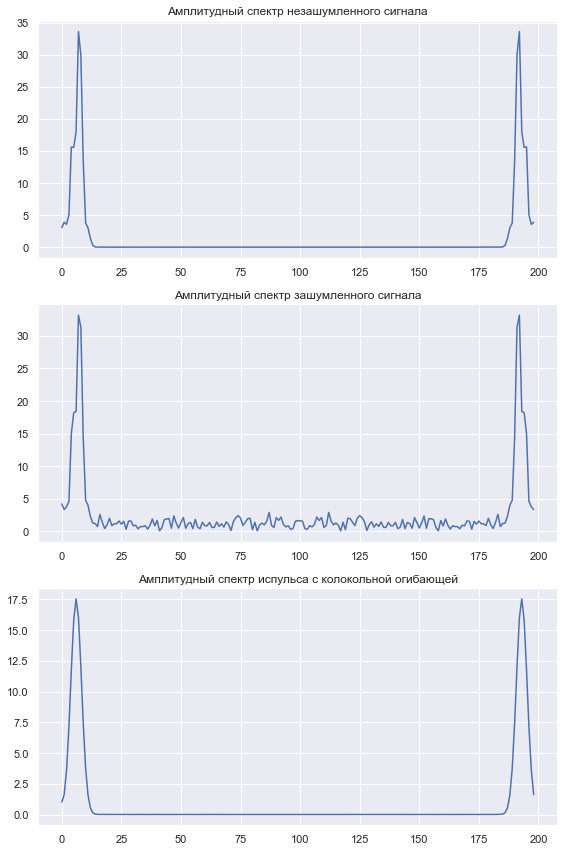

In [8]:
fig, axs = plt.subplots(3)
Ampl_E = (np.real(image_E)**2 + np.imag(image_E)**2)**0.5
Ampl_noised = (np.real(image_noised)**2 + np.imag(image_noised)**2)**0.5
Ampl_bell1 = (np.real(image_bell1)**2 + np.imag(image_bell1)**2)**0.5
fig.set_figheight(12)
fig.set_figwidth(8)
axs[0].plot(Ampl_E)
axs[0].title.set_text('Амплитудный спектр незашумленного сигнала')
axs[1].plot(Ampl_noised)
axs[1].title.set_text('Амплитудный спектр зашумленного сигнала')
axs[2].plot(Ampl_bell1)
axs[2].title.set_text('Амплитудный спектр испульса с колокольной огибающей')
plt.tight_layout()
plt.show()

## Обычная деконволюция

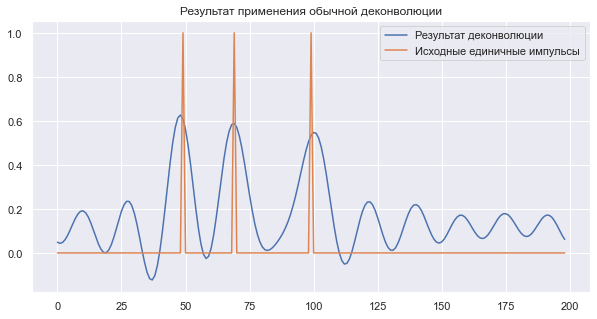

In [9]:
num = 12
image_filtered = np.concatenate((image_noised[0:num], np.zeros(199-num)))
image_x_n = image_filtered/image_bell1
x_n = np.fft.ifft(image_x_n)

plt.figure(figsize=(10,5))
plt.plot(np.real(x_n)*8, label = 'Результат деконволюции')
plt.plot(np.concatenate((x, np.zeros(199-x.size))), label = 'Исходные единичные импульсы')
plt.legend()
plt.title('Результат применения обычной деконволюции')
plt.show()

## Фильтр Винера

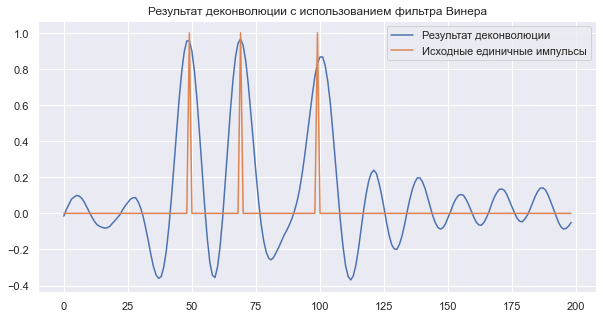

In [10]:
image_x_ = image_noised/image_bell1 * np.absolute(image_bell1)**2/(np.absolute(image_bell1)**2 + 0.7)
x_ = np.fft.ifft(image_x_)

plt.figure(figsize=(10,5))
plt.plot(np.real(x_)*8, label = 'Результат деконволюции')
plt.plot(np.concatenate((x, np.zeros(199-x.size))), label = 'Исходные единичные импульсы')
plt.title('Результат деконволюции с использованием фильтра Винера')
plt.legend()
plt.show()

## Ричардсон-Люси (не получилось, проверить на изображениях)

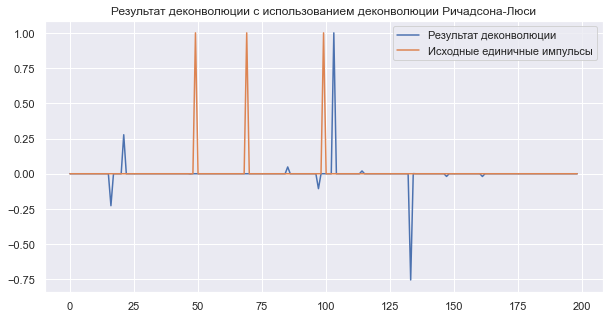

In [45]:
origin = np.concatenate((x, np.zeros(199-x.size)))
err_list = []
image = np.copy(noised)
PSF = np.copy(bell)
latent_est = np.ones(np.size(image))*np.mean(PSF)*0.2
PSF_HAT = np.copy(PSF[::-1])[::-1]
for i in range(200):
    for j in range(i):
        err = 0
        est_conv      = np.convolve(latent_est,PSF,'same')
        relative_blur = image/est_conv
        error_est     = np.convolve(relative_blur,PSF_HAT,'same')
        latent_est    = latent_est * error_est
        latent_est    = latent_est/np.max(latent_est)
    for k, _ in enumerate(latent_est):
        err+=(latent_est[k] - origin[k])**2
    err_list.append(err)
    

plt.figure(figsize=(10,5))
plt.plot(latent_est, label = 'Результат деконволюции')
plt.title('Результат деконволюции с использованием деконволюции Ричадсона-Люси')
plt.plot(origin, label = 'Исходные единичные импульсы')
plt.legend()
plt.show()  

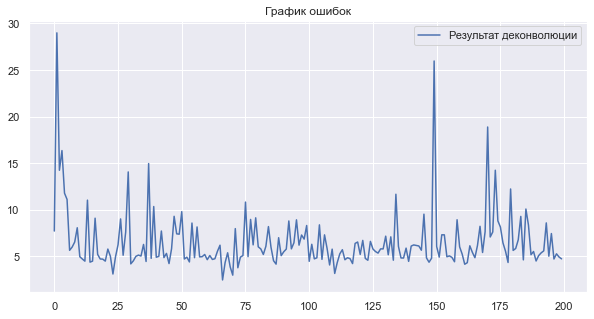

In [46]:
plt.figure(figsize=(10,5))
plt.plot(err_list, label = 'Результат деконволюции')
plt.title('График ошибок')
plt.legend()
plt.show()  

In [51]:
err_list.index(min(err_list))
err_list[66]

2.446443899332716

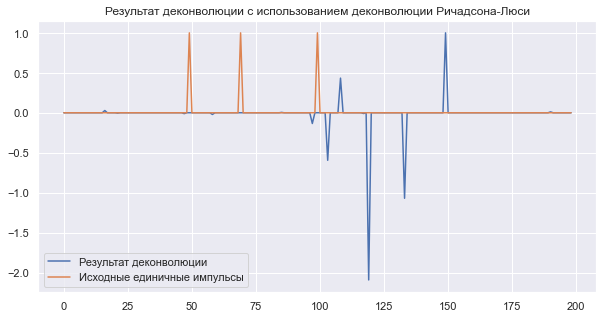

In [50]:
for i in range(65):
    est_conv      = np.convolve(latent_est,PSF,'same')
    relative_blur = image/est_conv
    error_est     = np.convolve(relative_blur,PSF_HAT,'same')
    latent_est    = latent_est * error_est
    latent_est    = latent_est/np.max(latent_est)


plt.figure(figsize=(10,5))
plt.plot(latent_est, label = 'Результат деконволюции')
plt.title('Результат деконволюции с использованием деконволюции Ричадсона-Люси')
plt.plot(origin, label = 'Исходные единичные импульсы')
plt.legend()
plt.show()  